In [ ]:
import folium
import pandas as pd
import json
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
laMap = folium.Map(location=[44.645857, -63.576851], tiles='Stamen Toner', zoom_start=13)

In [ ]:
# folium.CircleMarker((44.645849,-63.595128), radius=10, weight=1, color='red', fill_color='red', fill_opacity=.5).add_to(laMap)


In [ ]:
hm_wide = HeatMap([[44.645849,-63.595128,1.0],
                   [44.635850,-63.575129,2.0],
                   [44.6558551,-63.495130,3.0],
                   [44.642604, -63.587413,4.0],
                   [44.641467, -63.587546,5.0],
                   [44.641567, -63.587646,4.0],
                   [44.641367, -63.587346,5.0],
                   [44.658180, -63.593669,2.0],
                   [44.655908, -63.589010,1.0],
                   [44.654487, -63.614898,3.0],
                   [44.667978, -63.569711,4.0]
                  ],
                   min_opacity=0.9,
                   max_val=5.0,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )
laMap.add_child(hm_wide)

In [ ]:
laMap.save('heatmap.html')

In [ ]:
pwd

In [1]:
# !pip install convertdate
# !pip install LunarCalendar
!pip install fbprophet

In [2]:
import pandas as pd
from fbprophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [108]:
mydateparser = lambda x: pd.datetime.strptime(x, "%d-%m-%Y")
df = pd.read_csv("covid19.csv", parse_dates=['date'], date_parser=mydateparser)

# df = pd.read_csv("covid19.csv",dtype=object)
# df
df = df[df['prname'].dropna().str.contains("Nova Scotia")]
df = df.filter(['date','numtoday'])

# for i, row in df.iterrows():
#     print(row.values[0])
# df
# df['date'] =  pd.to_datetime(df['date'])
df.columns = ['ds', 'y']
# df = df.sort_values(by='date')
# df = df.dropna()

# df['ds'] = pd.to_datetime(df['ds'], format='%Y%m%d', errors='coerce')
df

,ds,y
66,2020-03-11,0.0
80,2020-03-12,0.0
96,2020-03-13,0.0
110,2020-03-14,0.0
126,2020-03-15,0.0
140,2020-03-16,3.0
155,2020-03-17,2.0
170,2020-03-18,2.0
185,2020-03-19,7.0
200,2020-03-20,1.0


In [109]:
df.head()

,ds,y
66,2020-03-11,0.0
80,2020-03-12,0.0
96,2020-03-13,0.0
110,2020-03-14,0.0
126,2020-03-15,0.0


In [110]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [111]:
future = m.make_future_dataframe(periods=5)

In [113]:
forecast = m.predict(future)
df = forecast[['ds', 'yhat']]
# df = df.sort_values(by='ds',ascending=True)
df[-5:]

,ds,yhat
51,2020-05-01,35.111064
52,2020-05-02,37.677606
53,2020-05-03,32.259717
54,2020-05-04,40.529448
55,2020-05-05,36.109509


In [45]:
df.to_csv("predicted.csv")

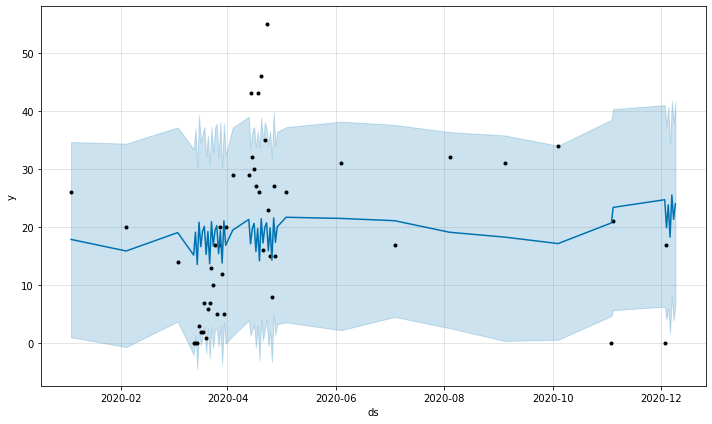

In [46]:
fig1 = m.plot(forecast)